In [1]:
import cv2
import numpy
import argparse
import time
import re

#from edgetpu.classification.engine import ClassificationEngine
from PIL import Image, ImageDraw, ImageFont

In [2]:
import re

def ReadLabelFile(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    ret = {}
    for line in lines:
        pair = re.split(r'[:\s]+', line.strip(), maxsplit=1)
        ret[int(pair[0])] = pair[1].strip()
    return ret


In [3]:
# find some useful color map
import PIL
#type(PIL.ImageColor.colormap.items())
import random
#colors = [(255,0,0,255) ,(0,255,0,255) ,(0,0,255,255),(255,255,0,255) ,(0,255,255,255) ,(255,255,255,255), \
#         (125,0,0,255) ,(125,255,0,255) ,(125,0,255,255),(125,255,0,255) ,(125,255,255,255) ,(125,255,255,255)]

colors = ['red','green','blue','yellow','magenta']

# Modelle (Select and init)

In [2]:
# models with different resolutions
!ls /notebooks/projectbodypix/models/*mobilenet*

/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_1024_768_16_quant_edgetpu_decoder.tflite
/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_1280_720_16_quant_edgetpu_decoder.tflite
/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_480_352_16_quant_edgetpu_decoder.tflite
/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_640_480_16_quant_edgetpu_decoder.tflite
/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_768_576_16_quant_edgetpu_decoder.tflite


In [3]:
from os import listdir
from os.path import isfile, join
mypath="/notebooks/projectbodypix/models/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles

['bodypix_mobilenet_v1_075_640_480_16_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_416_288_16_quant_edgetpu_decoder.tflite',
 'bodypix_mobilenet_v1_075_768_576_16_quant_edgetpu_decoder.tflite',
 'bodypix_mobilenet_v1_075_1280_720_16_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_960_736_32_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_928_672_16_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_640_480_16_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_864_624_32_quant_edgetpu_decoder.tflite',
 'bodypix_mobilenet_v1_075_480_352_16_quant_edgetpu_decoder.tflite',
 'bodypix_resnet_50_768_496_32_quant_edgetpu_decoder.tflite',
 'bodypix_mobilenet_v1_075_1024_768_16_quant_edgetpu_decoder.tflite']

In [4]:
from projectbodypix.pose_engine import PoseEngine, EDGES, BODYPIX_PARTS, KEYPOINTS

# Color mapping for bodyparts
RED_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "right" in v]
GREEN_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "hand" in v or "torso" in v]
BLUE_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "leg" in v or "arm" in v or "face" in v or "hand" in v]

#engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_1024_768_16_quant_edgetpu_decoder.tflite")
#engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_1280_720_16_quant_edgetpu_decoder.tflite")
#engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_480_352_16_quant_edgetpu_decoder.tflite")
engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_640_480_16_quant_edgetpu_decoder.tflite")
#engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_768_576_16_quant_edgetpu_decoder.tflite")

Heatmap size:  (41, 31)
Stride:  16 (41, 31)


# Some test data

In [5]:
from os import listdir
from os.path import isfile, join
import glob
mypath="/notebooks/data/"
#onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
#onlyfiles
wasen=sorted(glob.glob(mypath + '*'))

# Load and crop image

ok
(851, 480)


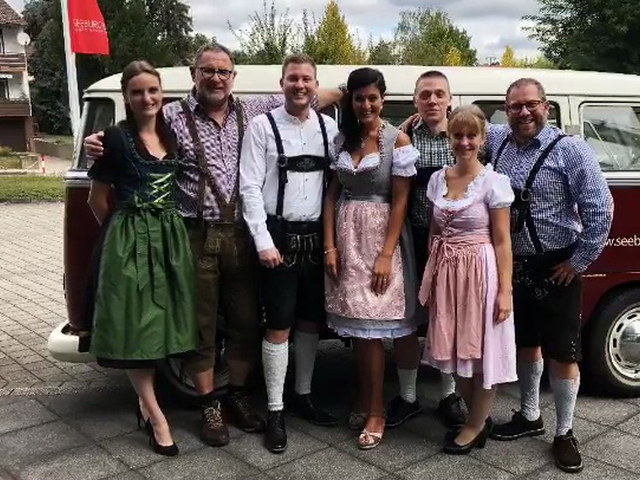

In [7]:
## load and crop image as required by the model

from base.image_tool  import ImageTool
import base.pose_tool as PoseTool

filename = wasen[104]
#filename = wasen[803]

# depends on model, e.g. 640, 320, 300
sizex = 640
sizey = 480

#sizex = 768 
#sizey = 576

#sizex = 1280 
#sizey = 720

img = ImageTool(filename=filename,h=sizey)

#img.testload()
#img.crop()
#img.testload()

img.printSize()

#img.crop(100,0,420,320)
#img.crop(0,0,320,320)

#img.crop(img.image.size[0] - sizex, 0, img.image.size[0], sizey)
img.crop(50, 0, 50 + sizex, sizey)

#screenshot = numpy.array(img.image)
display(img.image)

# Inference

In [8]:
screenshot = numpy.array(img.image)
inference_time, poses, heatmap, bodyparts = engine.DetectPosesInImage(screenshot)

In [9]:
import base.pose_tool as PoseTool
import numpy as np

pt_poses = np.array([])

for pose in poses:
    pt_poses = np.append(pt_poses,PoseTool.Pose(pose,minScoreKeypoint=-1))

In [10]:
pt_poses[0].printPose(mninScorePose=-0.1, minScoreKeypoint=-1)


Pose Score:  0.9160467
 nose                 x=522  y=112  score=1.00
 left eye             x=529  y=103  score=1.00
 right eye            x=515  y=104  score=1.00
 left ear             x=543  y=108  score=0.96
 right ear            x=508  y=108  score=0.85
 left shoulder        x=569  y=150  score=0.99
 right shoulder       x=494  y=139  score=0.97
 left elbow           x=599  y=211  score=0.98
 right elbow          x=508  y=229  score=0.86
 left wrist           x=576  y=261  score=0.99
 right wrist          x=508  y=285  score=0.45
 left hip             x=560  y=278  score=0.94
 right hip            x=526  y=282  score=0.94
 left knee            x=559  y=350  score=0.99
 right knee           x=527  y=350  score=0.97
 left ankle           x=561  y=432  score=0.89
 right ankle          x=527  y=412  score=0.80


In [11]:
for pt_pose in pt_poses:
    pt_pose.addSkeleton(img,EDGES,color='grey',width=5)
    
    text = str(round(pt_pose.pose.score,2))
    img.drawText(text , pt_pose.xys['right eye'][0], pt_pose.xys['right eye'][1] -30, size=20, color='white')

In [12]:
import base.pose_tool as PoseTool
import random

keys=('left wrist','left elbow', 'right wrist','right elbow', 'right eye', 'left eye')
restkeys = set(keys).symmetric_difference(set(KEYPOINTS))

colors = ['red','green','blue','yellow','magenta']

for pt_pose in pt_poses:
    pt_pose.addPointsText(img,keys,random.choice(colors) ,2,10)
    pt_pose.addPointsText(img,restkeys,'white',2,10)

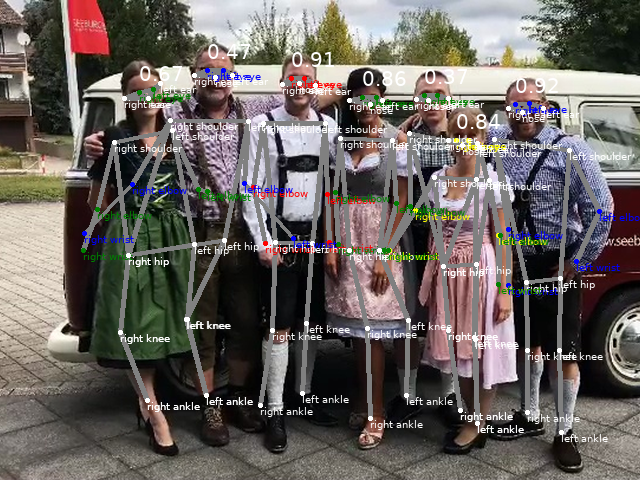

(640, 480)


In [13]:
#display(pil_image.resize((1280, 720), Image.NEAREST))
display(img.image)
print(img.image.size)

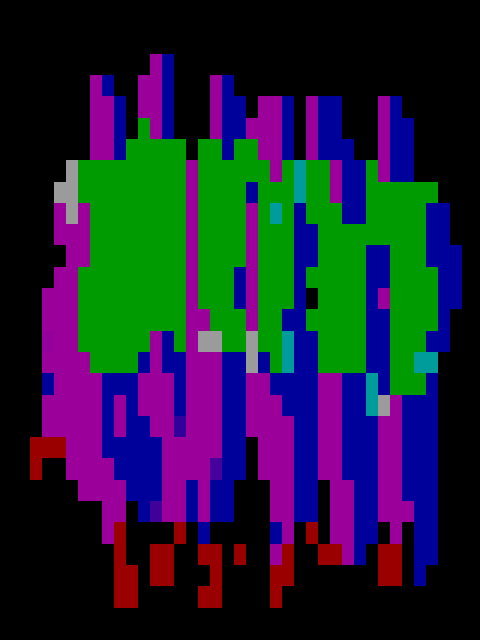

In [14]:
import numpy as np
import scipy.ndimage
import scipy.misc

image = img.image

def clip_heatmap(heatmap, v0, v1):
      a = v0 / (v0 - v1);
      b = 1.0 / (v1 - v0);
      return np.clip(a + b * heatmap, 0.0, 1.0);

# clip heatmap to create a mask
heatmap = clip_heatmap(heatmap,  -1.0,  1.0)


rgb_heatmap = np.dstack([
            heatmap*(np.sum(bodyparts[:,:,RED_BODYPARTS], axis=2)-0.5)*100,
            heatmap*(np.sum(bodyparts[:,:,GREEN_BODYPARTS], axis=2)-0.5)*100,
            heatmap*(np.sum(bodyparts[:,:,BLUE_BODYPARTS], axis=2)-0.5)*100,
])


rgb_heatmap.shape, heatmap.shape
image.size

rgb_heatmap= 155*np.clip(rgb_heatmap, 0, 1)
rescale_factor = [
      image.size[0]/heatmap.shape[0],
      image.size[1]/heatmap.shape[1],
      1]

rgb_heatmap = scipy.ndimage.zoom(rgb_heatmap, rescale_factor, order=0)

output_image = rgb_heatmap
int_img = np.uint8(np.clip(output_image,0,255))

int_img[0][0]
Image.fromarray(int_img)

# Capture video with webcam

In [1]:
# Init: nach jedem restart Kernel
## ACHTUNG webcam muss lokal initialisiert werden
## webcam bei start verbunden

import cv2
import numpy
import argparse
import time
import re
from PIL import Image, ImageDraw, ImageFont
    
##2    
import PIL
#type(PIL.ImageColor.colormap.items())
import random
#colors = [(255,0,0,255) ,(0,255,0,255) ,(0,0,255,255),(255,255,0,255) ,(0,255,255,255) ,(255,255,255,255), \
#         (125,0,0,255) ,(125,255,0,255) ,(125,0,255,255),(125,255,0,255) ,(125,255,255,255) ,(125,255,255,255)]

colors = ['red','green','blue','yellow','magenta']

from projectbodypix.pose_engine import PoseEngine, EDGES, BODYPIX_PARTS, KEYPOINTS
# Color mapping for bodyparts
RED_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "right" in v]
GREEN_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "hand" in v or "torso" in v]
BLUE_BODYPARTS = [k for k,v in BODYPIX_PARTS.items() if "leg" in v or "arm" in v or "face" in v or "hand" in v]
engine = PoseEngine("/notebooks/projectbodypix/models/bodypix_mobilenet_v1_075_640_480_16_quant_edgetpu_decoder.tflite")

Heatmap size:  (41, 31)
Stride:  16 (41, 31)


In [ ]:
#AttributeError: 'NoneType' object has no attribute '__array_interface__'
# Kernel restart

import numpy as np
from PIL import Image
from imutils.video import FPS
from imutils.video import VideoStream
from IPython.display import display, clear_output
from PIL import ImageChops
import time
import base.pose_tool as PoseTool
import numpy as np
from base.image_tool  import ImageTool
import base.pose_tool as PoseTool

# Initialize video stream
sizey = 480
vs = VideoStream(usePiCamera=False, resolution=(640, sizey)).start()
time.sleep(1)
fps = FPS().start()
screenshot = vs.read()
image = Image.fromarray(screenshot)

try:
    while True:
        screenshot = vs.read()
        
        inference_time, poses, heatmap, bodyparts = engine.DetectPosesInImage(screenshot)
        
        pt_poses = np.array([])
        for pose in poses:
            pt_poses = np.append(pt_poses,PoseTool.Pose(pose,minScoreKeypoint=-1))
        
        print(len(pt_poses))
        
        image = Image.fromarray(screenshot)
        img = ImageTool(image=image,h=sizey)

        # visualization
        keys=('left wrist','left elbow', 'right wrist','right elbow', 'right eye', 'left eye')
        restkeys = set(keys).symmetric_difference(set(KEYPOINTS))
        colors = ['red','green','blue','yellow','magenta']

        for pt_pose in pt_poses:
            #pt_pose = PoseTool.Pose(pose,-1)
            xys = pt_pose.xys
    
            pt_pose.addPointsText(img,keys,random.choice(colors) ,2,10)
            pt_pose.addPointsText(img,restkeys,'white',2,10)
        
        # removes output from paragraph, display resulting image
        clear_output(wait=True)
        display(img.image)

except:
    print("EXCEPTION or stop !!!! Restart kernel")
    display(image) 
    fps.stop()
    vs.stop()

# Nur zum Testen der Video Loop

In [1]:
## ACHTUNG webcam muss lokal initialisiert werden
## webcam bei start verbunden
from base.image_tool import videoTool
video = videoTool()

In [ ]:
#from base.image_tool import videoLoop
#import time
try:
    video.loop()
except:
    display(video.image) 
    video.stop()

In [ ]:
video.stop